## Linear Dependency 

- Correlations are good for quantifying the **linear** codependency between random variables.

- This form of codependency (linearity) can be measured using different distance metrics:

$$ d_{|p|}[X,Y] = \sqrt{1/2\times(1-\rho[X,Y])}$$

or

$$ d_{|p|}[X,Y] = \sqrt{(1-\rho[X,Y])}$$

## Non Linear Dependency 

- When the variables X and Y are bound by a non linear relationship, the above distance metric misdjuges the similarity of these variables.

- For nonlinear cases, the **normalised variable of information** is a more appropriate distance
metric. It allows us to answer the questions regarding the unique information contributed
by a random variable, without having to make functional assumptions. Given that many ML algorithms
do not impose a functional form on the data, it makes sense to use them in conjunction
with entropy-based features.





In [1]:
import numpy as np
import pandas as pd 

import scipy.stats as ss
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt

from src import entropy

Text(0.1, 0.9, 'nmi=0.6438647001258101; \n corr=-0.007964022927956333')

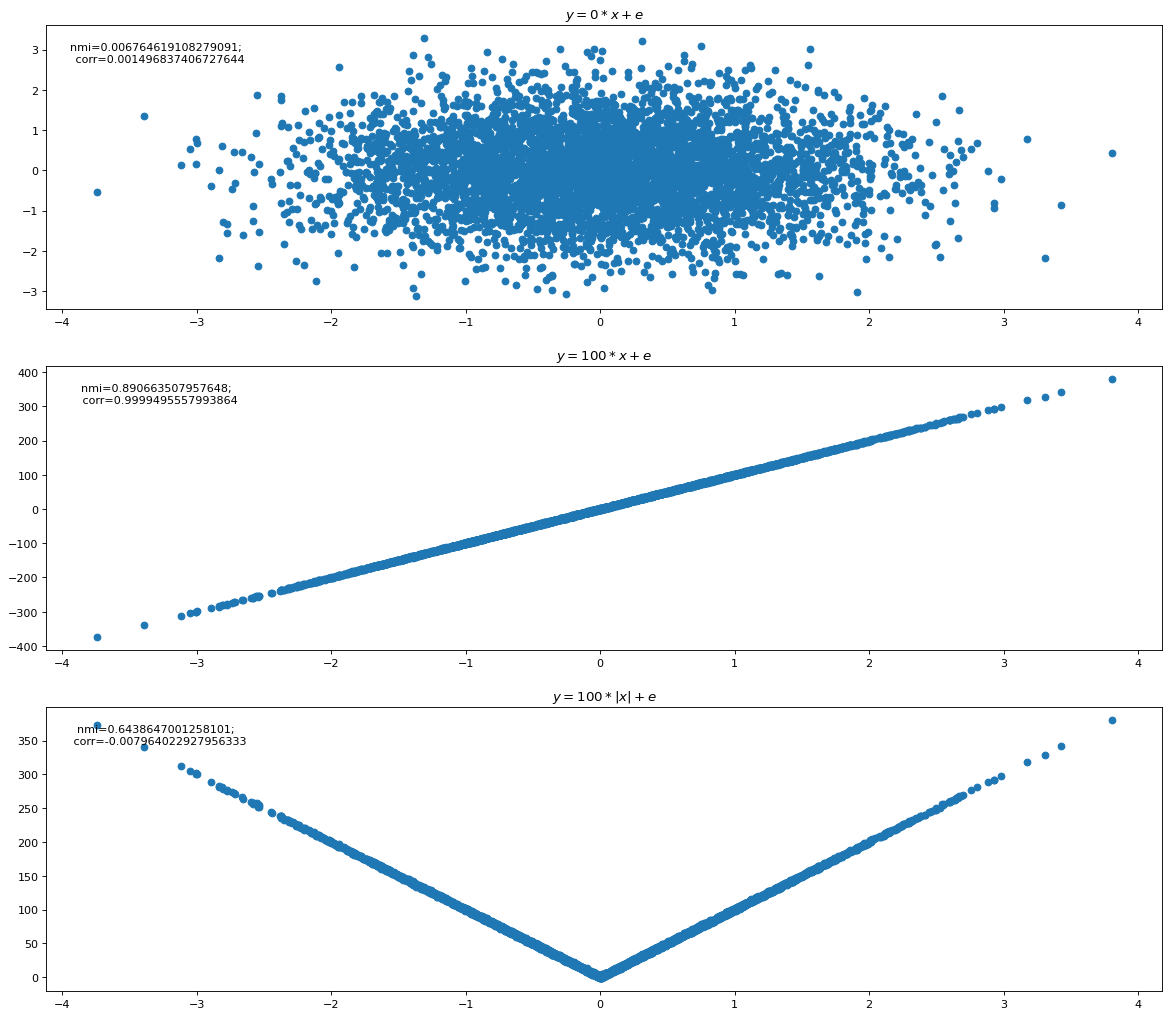

In [2]:
size, seed = 5000, 0

np.random.seed(seed)

x = np.random.normal(size=size)
e = np.random.normal(size=size)

fig, axs = plt.subplots(3, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# marker symbol
y = 0*x + e
nmi = entropy.mutual_info(x, y, norm=True)
corr = np.corrcoef(x,y)[0,1]
axs[0].scatter(x, y)
axs[0].set_title(r"$y = 0*x + e$")
axs[0].text(0.1, 0.9, f"nmi={nmi}; \n corr={corr}",
     horizontalalignment='center',
     verticalalignment='center',
     transform = axs[0].transAxes)

y = 100*x + e
nmi = entropy.mutual_info(x, y, norm=True)
corr = np.corrcoef(x,y)[0,1]
axs[1].scatter(x, y)
axs[1].set_title(r"$y = 100*x + e$")
axs[1].text(0.1, 0.9, f"nmi={nmi}; \n corr={corr}",
     horizontalalignment='center',
     verticalalignment='center',
     transform = axs[1].transAxes)

y = 100*abs(x) + e
nmi = entropy.mutual_info(x, y, norm=True)
corr = np.corrcoef(x,y)[0,1]
axs[2].scatter(x, y)
axs[2].set_title(r"$y = 100*|x| + e$")
axs[2].text(0.1, 0.9, f"nmi={nmi}; \n corr={corr}",
     horizontalalignment='center',
     verticalalignment='center',
     transform = axs[2].transAxes)

# Exercises
1. We draw 1000 observations from a bivariate Normal Distribution with unit standard deviations and a correlation coefficient $\rho \in \{ -1, -.5, 0, .5, 1 \}$
2. In this section, we discretize the observations and compute H[X], H[Y], H[X,Y], H[X|Y], I[X,Y], VI[X,Y], VI_norm[X,Y] using 

In [3]:
def show_result(results_final):
    """
    Function to plot the results that are in dict format  
    results_final = {
        'N=1000': { # Curves labels
            '0': { # Rho 
                'H[X]': ...
            }
        }
    }
    """
    measures = results_final['N=1000'][0].keys()

    fig, axs = plt.subplots(len(measures)//2+1, 2,  figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k', constrained_layout=True)
    # Are H[X], H[Y], affected by rho ? Yes as per the results below
    for result_desc, results in results_final.items():
        for axs_id, measure in enumerate(measures):
            axs[axs_id//2, axs_id%2].plot(rhos, tuple(v[measure] for v in results.values()), label=result_desc)
            axs[axs_id//2, axs_id%2].set_title(measure)
            axs[axs_id//2, axs_id%2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [6]:
size, seed = 1000, 0
np.random.seed(seed)
bins = 10
results_final = {}
results_temp = {}
#rhos = (-0.9999, -.75, -.5, -.25, 0, .25, .5, .75, 0.9999)
rhos = np.arange(-0.99, 0.99, 0.1)

for rho in rhos:
    x, y = np.random.multivariate_normal([0, 0], [[1, rho], [rho, 1]], size=size).T
    results_temp[rho] = {
        "H[X]": entropy.marginal(x, bins),
        "H[Y]": entropy.marginal(y, bins),
        "H[X,Y]": entropy.joint(x, y, bins=bins),
        "H[X|Y]": entropy.conditional(x, y, bins=bins),
        "I[X,Y]": entropy.mutual_info(x, y, bins=bins),
        "VI[X,Y]": entropy.variation_info(x, y, bins=bins),
        "VI_N[X,Y]": entropy.variation_info(x, y, bins=bins, norm=True)
    }
    
results_final['N=1000'] = results_temp

2. Exercise 1 with 1 million observations

In [ ]:
size, seed = int(1e6), 0
np.random.seed(seed)
bins = 10
results_temp = {}

for rho in rhos:
    x, y = np.random.multivariate_normal([0, 0], [[1, rho], [rho, 1]], size=size).T
    results_temp[rho] = {
        "H[X]": entropy.marginal(x, bins),
        "H[Y]": entropy.marginal(y, bins),
        "H[X,Y]": entropy.joint(x, y, bins=bins),
        "H[X|Y]": entropy.conditional(x, y, bins=bins),
        "I[X,Y]": entropy.mutual_info(x, y, bins=bins),
        "VI[X,Y]": entropy.variation_info(x, y, bins=bins),
        "VI_N[X,Y]": entropy.variation_info(x, y, bins=bins, norm=True)
    }
results_final['N=1e6'] = results_temp

3. Exercise 1 with 1 million observations

In [ ]:
size, seed = int(1e6), 0
np.random.seed(seed)

results_temp = {}

for rho in rhos:
    x, y = np.random.multivariate_normal([0, 0], [[1, rho], [rho, 1]], size=size).T
    bins = None
    results_temp[rho] = {
        "H[X]": entropy.marginal(x, bins=bins),
        "H[Y]": entropy.marginal(y, bins=bins),
        "H[X,Y]": entropy.joint(x, y, bins=bins),
        "H[X|Y]": entropy.conditional(x, y, bins=bins),
        "I[X,Y]": entropy.mutual_info(x, y, bins=bins),
        "VI[X,Y]": entropy.variation_info(x, y, bins=bins),
        "VI_N[X,Y]": entropy.variation_info(x, y, bins=bins, norm=True)
    }
    bins = entropy.num_bins(x.shape[0], corr=np.corrcoef(x, y)[0, 1])
    print(f"Optimal Bins = {bins} \tfor rho = {rho}")
results_final['N=1e6 with optimal bining'] = results_temp

There is an issue with the np.histogram2 function that leads to a memory leak for an a bivariate normal distribution
with a rho equal to 1 or -1. When $\rho$ is near from 1, the bias cancellation becomes very difficult to achieve 
because of the higher influence of the term $$

In [ ]:
show_result(results_final)

- $H[X]$ and $H[Y]$ are slightly impacted with the change in the correlation. For the higher number of observations and with the optimal bining, the marginal entropies are higher. 
- $H[X,Y]$ that stands for the joint entropy is minimal for positively or negatively correlated observations. We see a decrease in the joint entropy with more positive or negative correlation. The joint formula used with the optimal bining is not the same as the one described in the Machine Learning for Asset Managers book (snippet 3.3). In this calculation, H[X,Y] = H[X] + H[Y] - I[X,Y] where the marginal entropy is calculated using the univariate optimal bining and the mutual information is calculated with the bivariate optimal bining. When using the same formula as in snippet 3.3, the H[X,Y] had the same behavior as the marginal entropy (slighlty fixed value) which is not expected. The next step is to use a direct JE (joint entropy) estimator. 
- $H[X|Y]$ is zero when the observations are positively or negatively correlated. The conditional entropy is the uncertainty in X if we are told the value of Y. The same observation can be made for the variation of information metric $VI[X,Y]$, $\widetilde{VI}[X,Y]$
- $I[X,Y]$ has the opposite behavior of the variation of information in the sense that the mutual information is the information gain in X that results from knowing Y.

In [ ]:
for result_desc, results in results_final.items():
    print(f"\nResults for {result_desc}")
    print(pd.DataFrame.from_dict(results))